<a href="https://colab.research.google.com/github/HHHOOOXX/potential-memory/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 4.1 정규방정식
import numpy as np #numpy 라이브러리를 가져와서 np로 별칭을 지정합니다
np.random.seed(42) #난수 생성 시드를 설정하여, 난수발생을 동일하게 만듭니다.이는 코드를 여러번 실행할때 동일한 결과를 얻기 위함입니다.
m = 100 #데이터 포인트의 개수를 나타내는 변수 m을 설정합니다. 여기서는 100개의 데이터 포인트를 생성합니다.
x = 2*np.random.rand(m,1) #열벡터 #m개의 랜덤한 값을 가진 열벡터x를 생성합니다.
#범위는 0부터 1사이의 값을가집니다. 이후 2를 곱하여 범위를 0부터 2까지로 변경합니다.
y = 4+3*x+np.random.randn(m,1) #열벡터 #입력x에 대응하는 타깃 y를 생성합니다.
#선형 관계 y= 4+3x에 잡음을 추가합니다. 'np.random.randn(m,1)'는 표준 정규 분포(평균0, 표준편차 1)에서 추출한 m개의 난수로 이루어진 열벡터를 생성합니다.

In [4]:
#넘파이 선형대수 모듈(np.linalg)에 있는 inv()함수를 사용해 역행렬을 계산하고 dot()메서드를 사용해 행렬곱셈을 합니다.

from sklearn.preprocessing import add_dummy_feature
#sklearn의 add_dummy_feature 함수를 사용하여 각 샘플에 bias를 나타내는 특성을 추가합니다.
x_b = add_dummy_feature(x) #각 샘플에 x0 = 1 을 추가한 특성 행렬 x_b를 생성합니다.
theta_best = np.linalg.inv(x_b.T@ x_b)@ x_b.T @ y
#x_b.T @ x_b 는 특성행렬 x_b의 전치행렬과 자신의 행렬곱을 의미합니다. 곱셈결과로 x_b의 공분산행렬이 됩니다.
#np.linalg.inv(x_b.T @ x_b)는 공분산 행렬의 역행렬을 계산합니다.
#x_b.T @ y 는 특성행렬 x_b의 전치행렬과 타깃 벡터 y의 행렬 곱을 계산합니다.

In [5]:
theta_best
np.array([[4.21509616],[2.77011339]])
# 주어진 데이터를 이용하여 구한 최적의 세타 값, 이는 선형회귀 모델의 절편과 기울기를 나타냅니다.
# 4.21509616은 절편(intercept),2.77011339는 기울기(coefficient)에 해당합니다.

array([[4.21509616],
       [2.77011339]])

In [6]:
# 새로운 입력 데이터인 x_new에 대해 예측을 수행하는 코드입니다.

x_new = np.array([[0],[2]])
#새로운 입력 데이터 x_new를 정의합니다. 여기서는 x의 범위를 0부터2까지로 설정합니다.
x_new_b = add_dummy_feature(x_new) #각 샘플에 x0 = 1을 추가합니다.
#새로운 입력 데이터에 대한 bias를 나타내는 특성 x0=1을 추가합니다.
y_predict = x_new_b @ theta_best
#새로운 입력 데이터에 대한 예측을 수행합니다.
#입력 데이터에 대한 예측값을 계산하기 위해 특성 행렬 x_new_b와 최적의 모델 파라미터인 세타값을 곱합니다.
y_predict
np.array([[4.21509616],[9.75532293]])
# 새로운 입력 데이터에 대한 예측값을 출력합니다.
#따라서 입력값이 0일때 예측값은 4.21509616이고, 입력 값이 2일때 예측값은 9.75532293입니다.

array([[4.21509616],
       [9.75532293]])

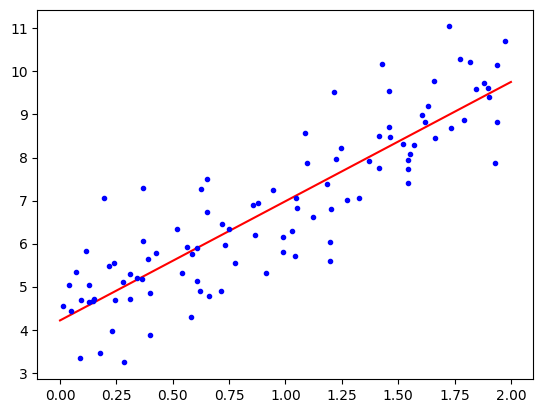

In [7]:
import matplotlib.pyplot as plt # 'matplotlib.pyplot' 모듈을 'plt'로 가져옵니다.이 모듈은 그래프를 그리는데 사용됩니다.
plt.plot(x_new, y_predict, "r-", label ="예측") #'plt.plot()'함수를 사용하여 x_new에 대한 예측값인 y_predict를 그립니다.
#"r-"은 빨간색 선을 의미합니다. "-"는 선의 스타일을 지정합니다.
#"예측"은 이 선에 대한 레이블로, 범례에 표시됩니다.
plt.plot(x,y,"b.") #'plt.plot()' 함수를 사용하여 x와y의 원본 데이터를 그립니다.
#"b."는 파란색 점을 의미합니다. "."은 점을 그리라는 것을 의미합니다
[...] #레이블, 축, 그리드, 범례를 추가합니다.
plt.show() #그래프를 화면에 출력합니다.

In [8]:
from sklearn.linear_model import LinearRegression
# scikit-learn에서 LinearRegression 클래스를 가져옵니다. 이 클래스는 선형회귀 모델을 구현합니다.
lin_reg = LinearRegression()
# LinearRegression 클래스의 인스턴스를 생성하여 lin_reg변수에 할당합니다.이 변수는 선형 회귀 모델을 나타냅니다.

lin_reg.fit(x,y)
#lin_reg 모델을 데이터x와 타깃y에 맞춥니다. 즉, 선형 회귀 모델을 학습합니다.

lin_reg.intercept_, lin_reg.coef_
#학습된 모델의 절편(intercept)와 기울기(coefficient)를 확인합니다.

(np.array([4.21509616]),np.array([[2.77011339]]))
#결과는 각각 (4.21509616),(2.77011339)입니다

lin_reg.predict(x_new)
#학습된 모델을 사용하여 새로운 데이터x_new에 대한 예측을 수행합니다.
np.array([[4.21509616],[9.75532293]])
#예측 결과입니다. 입력 값이 0일 때 예측값은 4.21509616이고,입력 값이 2일 때 예측값은 9.75532293입니다.

array([[4.21509616],
       [9.75532293]])

In [9]:
#사이킷런은 특성의 가중치(coef_)와 편향(intercept_)을 분리하여 저장합니다.
#LinearRegression 클래스는 scipy.linalg.lstsq() 함수('최소 제곱'에서 이름을 따왔습니다)를 기반으로 합니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd #np.linalg.lstsq()함수를 사용하여 선형 회귀 모델을 학습합니다.
#x_b는 특성 행렬이며, y는 타깃벡터입니다.
#rcond는 특이값분해를 사용하여 역행렬을 계산 할 때 사용되는 임계값입니다.
#rank는 행렬의 랭크를 나타냅니다. s는 특이값을 나타냅니다.
#학습된 모델의 가중치(coef_)와 편향(intercept_)을 출력합니다.
np.array([[4.21509616],[2.77011339]])
#결과는 np.array값으로, coef_와 intercept_와 동일한 값을 가지고 있습니다.

array([[4.21509616],
       [2.77011339]])

In [10]:
#np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있습니다.
np.linalg.pinv(x_b) @ y
#np.linalg.pinv()함수를 사용하여 x_b의 유사 역행렬을 계산합니다.
#유사 역행렬을 타깃 벡터 y와 곱하여 선형 회귀 모델을 학습합니다.
np.array([[4.21509616],[2.77011339]])
#학습된 모델의 가중치(coef_)와 편향(intercept_)을 출력합니다
#결과는 np.linalg.lstsq()함수와 마찬가지로 np.array값으로, coef_와 intercept_동일한 값을 가지고 있습니다.

array([[4.21509616],
       [2.77011339]])

In [11]:
#4.2 경사하강법
eta = 0.1 #학습률
n_epochs = 1000 #전체 데이터셋을 몇 번 반복할지 결정하는 에포크 횟수
m = len(x_b) #샘플개수
np.random.seed(42)
theta = np.random.randn(2,1) #모델 파라미터를 랜덤하게 초기화합니다.
for epoch in range(n_epochs):
    gradients = 2 / m*x_b.T @ (x_b @ theta - y)
    theta = theta - eta * gradients
# n_epochs 만큼 반복하는 반복문입니다. 각 반복마다 경사하강법을 수행하여 모델을 학습합니다.
# gradients는 비용함수의 그래디언트(기울기)를 계산합니다.이는 전치된 특성행렬(x_b.T)과 예측값(x_b @ theta)과 타깃값(y)의 차이에 대한 행렬 곱입니다.
# 경사 하강법의 업데이트 식에 따라 theta를 업데이트합니다. 현재 theta에서 학습률(eta)과 gradients를 곱한값을 빼주어 새로운 theta를 구합니다.

In [19]:
theta
np.array([[4.21509616],[2.77011339]])

array([[4.21509616],
       [2.77011339]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터
# n_epochs는 전체 데이터셋을 몇 번 반복할지를 결정하는 변수입니다.
# t0와 t1은 학습 스케줄 함수에서 사용되는 하이퍼파라미터입니다.
def learning_schedule(t):
    return t0 / (t + t1)
    #학습스케줄 함수를 정의합니다. 학습 스케줄은 학습률을 조정하는데 사용됩니다.t0과 t1의 값에 따라 학습률이 조절됩니다.
np.random.seed(42)
theta = np.random.randn(2,1) #랜덤 초기화
# np.random.randn(2,1)는 평균이 0이고 표준편차가 1인 가우시안 분포에서 추출된 랜덤한 값으로 theta를 초기화합니다.
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index +1]
        yi = y[random_index:random_index +1]
        gradients = 2 *xi.T @ (xi @ theta - yi) #sgd의 경우 m으로 나누지 않습니다.
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
#n_epochs만큼 반복하는 외부 반복문입니다. 각 반복마다 SGD를 사용하여 모델을 학습합니다.
#내부 반복문에서는 데이터셋을 한 번씩 순회합니다.
#random_index를 사용하여 랜덤한 샘플을 선택합니다.
#xi와yi는 선택된 샘플의 특성과 타깃을 나타냅니다.
#gradients는 현재 샘플에 대한 비용 함수의 기울기를 계산합니다.
#학습률은 학습 스케줄 함수를 통해 결정됩니다.
#경사 하강법의 업데이트 식에 따라 theta를 업데이트합니다,

In [13]:
theta
np.array([[4.21076011],[2.74856079]])

array([[4.21076011],
       [2.74856079]])

In [14]:
from sklearn.linear_model import SGDRegressor
#scikit-learn에서 SGDRegressor 클래스를 가져옵니다. 이 클래스는 SGD 기반의 선형 회귀 모델을 구현합니다.
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,n_iter_no_change=100, random_state=42)
#SGDRegressor 클래스의 인스턴스를 생성합니다.
#max_iter는 반복 횟수의 상한을 나타냅니다. 최대 1000번의 반복을 설정합니다.
#tol은 최적화를 중지하는데 사용되는 공차를 나타냅니다. 공차가 1e-5보다 작으면 최적화가 중지됩니다.
#penalty는 규제항을 설정하는 매개변수입니다. None으로 설정되어 있으므로 규제를 사용하지 않습니다.
#eta0는 학습률의 초기값을 나타냅니다.
#n_iter_no_change은 조기 종료를 위해 설정된 매개변수입니다.
#random_state는 난수 생성 시드를 설정합니다.
sgd_reg.fit(x,y.ravel())
# fit()이 1D 타깃을 기대하기 때문에 y.ravel()로 씁니다.
#SGDRegressor 모델을 주어진 데이터 x와 타깃 y를 사용하여 학습합니다.
#y.ravel()은 1D 타깃을 기대하기 때문에 타깃 데이터를 1차원 배열로 변환합니다. fit() 메서드는 1차원 배열을 입력으로 받습니다.






SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_,sgd_reg.coef_
(np.array([4.21278812]),np.array([2.77270267]))
# sgdregresson모델을 학습한 후의 절편과 계수입니다. 이는 각각 모델의 편향(intercept_)와 가중치(coef_)에 해당합니다.

(array([4.21278812]), array([2.77270267]))

In [16]:
#4.3 다항 회귀
np.random.seed(42) #난수 생성 시드를 설정하여 결과를 재현 가능하게 합니다.
m = 100 # 생성할 데이터 포인트의 개수를 설정합니다.
x = 6 * np.random.rand(m,1)-3 #x = 6 * np.random.rand(m,1) - 3: -3에서 3 사이의 균일한 분포를 가진 난수를 생성하여 x에 할당합니다.
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1) #y = 0.5 * x ** 2 + x + 2 + np.random.randn(m,1): 주어진 다항식인 0.5x^2 + x + 2에 잡음을 더한 값을 y에 할당합니다. 잡음은 평균이 0이고 표준 편차가 1인 정규 분포를 따릅니다.






In [26]:
from sklearn.preprocessing import PolynomialFeatures
#scikit-learn의 PolynomialFeatures 클래스를 가져옵니다. 이 클래스는 다항 특성을 생성하는 데 사용됩니다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#다항 특성 변환기를 생성합니다. degree 매개변수는 다항식의 차수를 결정하며, include_bias 매개변수는 편향을 포함할지 여부를 결정합니다.
x_poly = poly_features.fit_transform(x)
#주어진 x 데이터를 다항 특성으로 변환합니다. 새로운 x_poly는 원래 특성 x와 이의 제곱인 2차 다항 특성으로 구성됩니다.
x[0] #x의 첫 번째 원소를 출력합니다. 이는 -0.75275929입니다.
np.array([-0.75275929]) #변환 전의 x의 첫 번째 원소와 동일합니다
x_poly[0]
np.array([-0.75275929, 0.56664654])# 변환 전의 x의 첫 번째 원소와 동일합니다

array([-0.75275929,  0.56664654])

In [28]:
lie_reg = LinearRegression()
#LinearRegression 클래스의 인스턴스인 lin_reg을 생성합니다.
lin_reg.fit(x_poly, y)
#lin_reg.fit() 메서드를 사용하여 다항 특성인 x_poly와 타깃 데이터 y를 사용하여 선형 회귀 모델을 학습합니다.
lin_reg.intercept_, lin_reg.coef_
#학습된 모델의 절편(intercept_)과 계수(coef_)를 확인합니다.
#결과로 나온 값은 각각 절편과 다항 특성의 계수들을 나타냅니다.
(np.array([1.78134581]),np.array([[0.93366893, 0.56456263]]))
#절편(intercept_): 1.78134581 ,계수(coef_): [0.93366893, 0.56456263]

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

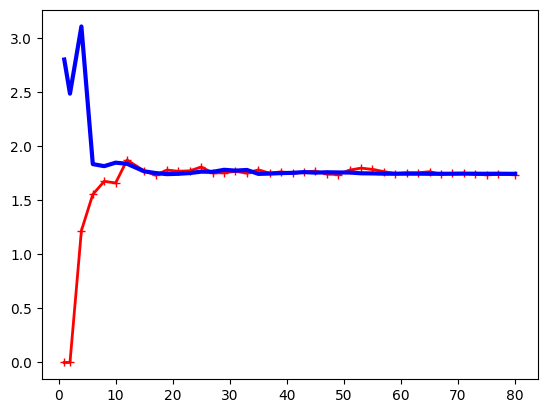

In [30]:
# 4.4 학습 곡선
from sklearn.model_selection import learning_curve
#scikit-learn의 learning_curve 모듈을 가져옵니다. 이 모듈은 학습 곡선을 그리는 데 사용됩니다.
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring="neg_root_mean_squared_error")
#learning_curve() 함수를 사용하여 학습 곡선 데이터를 생성합니다.
#LinearRegression()은 사용할 모델입니다. 여기서는 선형 회귀 모델을 사용합니다.
#x와 y는 훈련 데이터의 특성과 타깃입니다.
#train_sizes는 각각의 훈련 세트의 크기를 나타냅니다. np.linspace(0.01, 1.0, 40)은 0.01에서 1.0까지 40개의 값으로 이루어진 배열을 생성합니다.
#cv=5는 교차 검증을 위해 데이터를 5개의 폴드로 나누는 것을 의미합니다.
#scoring="neg_root_mean_squared_error"는 성능 평가 지표로 RMSE를 사용함을 의미합니다.
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
#각 훈련 세트와 검증 세트에 대한 오차를 계산합니다. RMSE를 사용했으므로 음수를 취하여 사용합니다.
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
#훈련 세트와 검증 세트에 대한 오차를 시각화합니다. 빨간색 선은 훈련 세트의 오차를 나타내고, 파란색 선은 검증 세트의 오차를 나타냅니다.
[...] #레이블, 축, 그리드, 범례를 추가합니다.
plt.show() #그래프를 출력합니다.

In [31]:
from sklearn.pipeline import make_pipeline
#scikit-learn의 make_pipeline 함수를 가져옵니다. 이 함수는 여러 변환기와 추정기를 연결하여 파이프라인을 만들어줍니다.
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())
#make_pipeline 함수를 사용하여 다항 회귀를 위한 파이프라인을 생성합니다.
#이 파이프라인은 다항 특성을 생성하는 PolynomialFeatures 변환기와 선형 회귀 모델인 LinearRegression을 연결합니다.
#degree=10은 10차 다항 회귀를 수행함을 나타냅니다.
train_sizes, train_scores, valid_scores = learning_curve(
     polynomial_regression, x, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,
     scoring="neg_root_mean_squared_error")
#learning_curve 함수를 사용하여 학습 곡선 데이터를 생성합니다.
#이전과 동일하게 Polynomial Regression 모델을 사용하여 학습 곡선을 생성합니다.
[...] #이전과 동일

[Ellipsis]

In [32]:
# 4.5 규제가 있는 선형 모델
from sklearn.linear_model import Ridge
#scikit-learn의 Ridge 모델을 가져옵니다.
ridge_reg = Ridge(alpha=0.1,solver="cholesky")
#Ridge 모델의 인스턴스를 생성합니다.
#alpha는 규제 강도를 나타내며, 작을수록 규제가 약해집니다.
#solver는 최적화에 사용되는 알고리즘을 지정합니다. cholesky는 Cholesky 분해를 사용합니다.
ridge_reg.fit(x,y)
#Ridge 회귀 모델을 주어진 데이터 x와 타깃 y에 대해 학습합니다.
ridge_reg.predict([[1.5]])
#학습된 Ridge 회귀 모델을 사용하여 x=1.5에 대한 예측을 수행합니다.
np.array([[1.55325833]])
#x=1.5에 대한 예측 결과는 1.55325833입니다.

array([[1.55325833]])

In [36]:
sgd_reg = SGDRegressor(penalty="12",alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
...
...
sgd_reg.fit(x, y.ravel()) # fit()은 1D 타깃을 기대하므로 y.ravel()로 씁니다.
sgd_reg.predict([[1.5]])
np.array([1.55302613])

InvalidParameterError: The 'penalty' parameter of SGDRegressor must be a str among {'l1', 'elasticnet', 'l2'} or None. Got '12' instead.